In [2]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Configuración de parámetros
img_size = (224, 224)  # Tamaño esperado por MobileNetV2
batch_size = 32
epochs = 100
learning_rate = 1e-4

# Cargar el modelo MobileNetV2 preentrenado en ImageNet
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

# Congelar las capas base
for layer in base_model.layers:
    layer.trainable = False

# Añadir capas personalizadas
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Reduce la dimensión espacial
x = Dropout(0.5)(x)  # Regularización
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)  # Cambia el número de clases según tu conjunto de datos

# Construir el modelo completo
model = Model(inputs=base_model.input, outputs=predictions)

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Configuración del generador de datos para entrenamiento y validación
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

train_dir = 'C:/Users/yeiko/Capstone/Dataset/train'
val_dir = 'C:/Users/yeiko/Capstone/Dataset/valid'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Entrenar el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=epochs
)

# Guardar el modelo entrenado
model.save('C:/Users/yeiko/Capstone/Modelos/modelo_mobilenetv2.h5')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Found 2724 images belonging to 3 classes.
Found 289 images belonging to 3 classes.
Epoch 1/100


C:\Users\yeiko\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


85/85 ━━━━━━━━━━━━━━━━━━━━ 73s 748ms/step - accuracy: 0.4314 - loss: 1.5491 - val_accuracy: 0.7118 - val_loss: 0.6235
Epoch 2/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5625 - loss: 1.0834 - val_accuracy: 1.0000 - val_loss: 0.4430
Epoch 3/100


C:\Users\yeiko\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


85/85 ━━━━━━━━━━━━━━━━━━━━ 67s 756ms/step - accuracy: 0.5957 - loss: 0.9719 - val_accuracy: 0.7708 - val_loss: 0.4998
Epoch 4/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.7812 - loss: 0.5083 - val_accuracy: 1.0000 - val_loss: 0.1484
Epoch 5/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 68s 773ms/step - accuracy: 0.6946 - loss: 0.7337 - val_accuracy: 0.8264 - val_loss: 0.4658
Epoch 6/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - accuracy: 0.7188 - loss: 0.8311 - val_accuracy: 1.0000 - val_loss: 0.2462
Epoch 7/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 70s 790ms/step - accuracy: 0.7033 - loss: 0.7148 - val_accuracy: 0.8368 - val_loss: 0.4363
Epoch 8/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.6875 - loss: 0.6215 - val_accuracy: 1.0000 - val_loss: 0.6939
Epoch 9/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 70s 783ms/step - accuracy: 0.7243 - loss: 0.6800 - val_accuracy: 0.8576 - val_loss: 0.4257
Epoch 10/100
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step - accuracy: 0.7500 - loss: 0.5618 - val_accuracy: 1

Found 141 images belonging to 3 classes.


C:\Users\yeiko\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 383ms/step - accuracy: 0.9808 - loss: 0.0402
Precisión en el conjunto de prueba: 0.98
Pérdida en el conjunto de prueba: 0.06
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 716ms/step
Reporte de Clasificación:
              precision    recall  f1-score   support

      Bengin       0.95      0.97      0.96        39
   Malignant       1.00      1.00      1.00        72
      Normal       0.97      0.93      0.95        30

    accuracy                           0.98       141
   macro avg       0.97      0.97      0.97       141
weighted avg       0.98      0.98      0.98       141



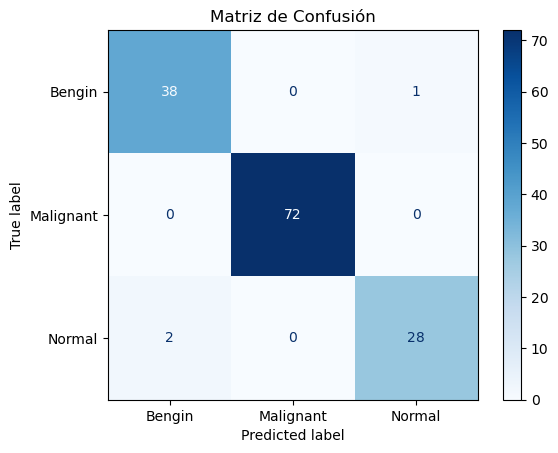

In [14]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Configuración de parámetros
img_size = (224, 224)
batch_size = 32

# Cargar el modelo entrenado
model_path = 'C:/Users/yeiko/Capstone/Modelos/modelo_mobilenetv2_v4.h5'
model = load_model(model_path)

# Configuración del generador de datos para el conjunto de prueba
test_dir = 'C:/Users/yeiko/Capstone/Dataset/test'
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Importante para alinear predicciones con etiquetas
)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.2f}")
print(f"Pérdida en el conjunto de prueba: {test_loss:.2f}")

# Obtener predicciones
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys(), zero_division=1))

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()


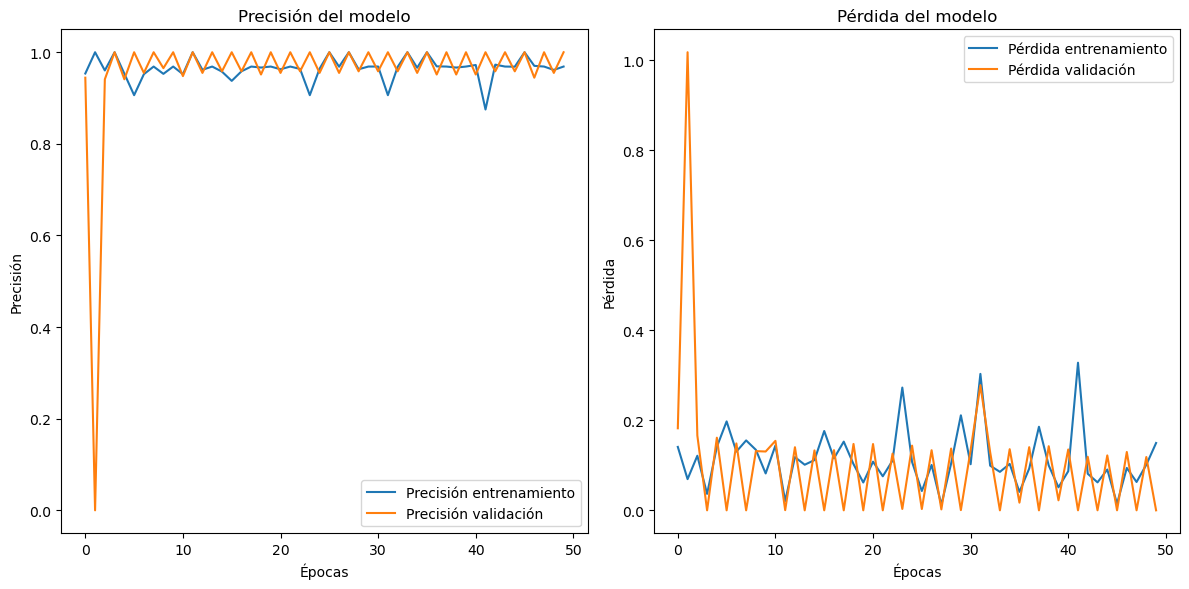

In [15]:
import matplotlib.pyplot as plt

# Suponiendo que `history` es el historial del entrenamiento del modelo
# Si ya tienes el historial, puedes cargarlo directamente o usar la variable `history`
# Ejemplo: history = model.fit(...)

# Graficar precisión
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # Subgráfico para la precisión
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión validación')
plt.title('Precisión del modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Graficar pérdida
plt.subplot(1, 2, 2)  # Subgráfico para la pérdida
plt.plot(history.history['loss'], label='Pérdida entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida validación')
plt.title('Pérdida del modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Mostrar los gráficos
plt.tight_layout()
plt.show()


In [11]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Configuración de parámetros
img_size = (224, 224)
batch_size = 32
retrain_epochs = 50  # Ajusta según sea necesario
learning_rate = 1e-5  # Tasa de aprendizaje reducida para fine-tuning

# Cargar el modelo previamente entrenado
model_path = 'C:/Users/yeiko/Capstone/Modelos/modelo_mobilenetv2_v3.h5'
model = load_model(model_path)

# Descongelar las últimas capas del modelo base para realizar fine-tuning
for layer in model.layers[-30:]:  # Ajusta el número de capas que quieras descongelar
    layer.trainable = True

# Compilar nuevamente el modelo con una nueva tasa de aprendizaje
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Configuración del generador de datos para entrenamiento y validación
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

train_dir = 'C:/Users/yeiko/Capstone/Dataset/train'
val_dir = 'C:/Users/yeiko/Capstone/Dataset/valid'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Calcular pesos de clase para manejar datos desbalanceados
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights_dict = dict(enumerate(class_weights))

# Reentrenar el modelo con fine-tuning
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=retrain_epochs,
    class_weight=class_weights_dict  # Aplica pesos de clase
)

# Guardar el modelo reentrenado
model.save('C:/Users/yeiko/Capstone/Modelos/modelo_mobilenetv2_v4.h5')


Found 2724 images belonging to 3 classes.
Found 289 images belonging to 3 classes.
Epoch 1/50


C:\Users\yeiko\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


85/85 ━━━━━━━━━━━━━━━━━━━━ 87s 883ms/step - accuracy: 0.9553 - loss: 0.1370 - val_accuracy: 0.9444 - val_loss: 0.1823
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 0.0693 - val_accuracy: 0.0000e+00 - val_loss: 1.0183
Epoch 3/50


C:\Users\yeiko\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


85/85 ━━━━━━━━━━━━━━━━━━━━ 77s 868ms/step - accuracy: 0.9594 - loss: 0.1244 - val_accuracy: 0.9410 - val_loss: 0.1663
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 546us/step - accuracy: 1.0000 - loss: 0.0365 - val_accuracy: 1.0000 - val_loss: 2.3842e-07
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 76s 861ms/step - accuracy: 0.9569 - loss: 0.1295 - val_accuracy: 0.9410 - val_loss: 0.1614
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 534us/step - accuracy: 0.9062 - loss: 0.1977 - val_accuracy: 1.0000 - val_loss: 1.1921e-07
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 77s 863ms/step - accuracy: 0.9501 - loss: 0.1330 - val_accuracy: 0.9549 - val_loss: 0.1487
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 546us/step - accuracy: 0.9688 - loss: 0.1554 - val_accuracy: 1.0000 - val_loss: 3.8147e-06
Epoch 9/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 77s 862ms/step - accuracy: 0.9569 - loss: 0.1142 - val_accuracy: 0.9653 - val_loss: 0.1316
Epoch 10/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 594us/step - accuracy: 0.9688 - loss: 0.0820 - val_accura